In [2]:
#pip install pandas_datareader

In [3]:
#pip install yfinance

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as data

In [4]:
start='2012-01-01'
end='2022-12-31'

df=data.download('SBI', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,9.79,9.87,9.77,9.79,5.993026,41900
2012-01-04,9.86,9.86,9.75,9.81,6.005271,21900
2012-01-05,9.80,9.87,9.78,9.85,6.029756,38500
2012-01-06,9.81,9.83,9.63,9.79,5.993026,23400
2012-01-09,9.82,9.83,9.80,9.83,6.017515,22500


In [5]:
df.shape

(2768, 6)

In [6]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,9.79,9.87,9.77,9.79,5.993026,41900
1,2012-01-04,9.86,9.86,9.75,9.81,6.005271,21900
2,2012-01-05,9.80,9.87,9.78,9.85,6.029756,38500
3,2012-01-06,9.81,9.83,9.63,9.79,5.993026,23400
4,2012-01-09,9.82,9.83,9.80,9.83,6.017515,22500


In [7]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,9.79,9.87,9.77,9.79,41900
1,9.86,9.86,9.75,9.81,21900
2,9.80,9.87,9.78,9.85,38500
3,9.81,9.83,9.63,9.79,23400
4,9.82,9.83,9.80,9.83,22500


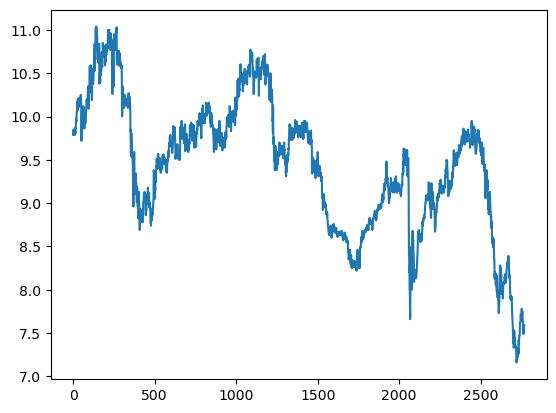

In [8]:
plt.plot(df.Close)

In [9]:
ma100=df.Close.rolling(100).mean()
ma100

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
2763    7.6584
2764    7.6503
2765    7.6427
2766    7.6354
2767    7.6286
Name: Close, Length: 2768, dtype: float64

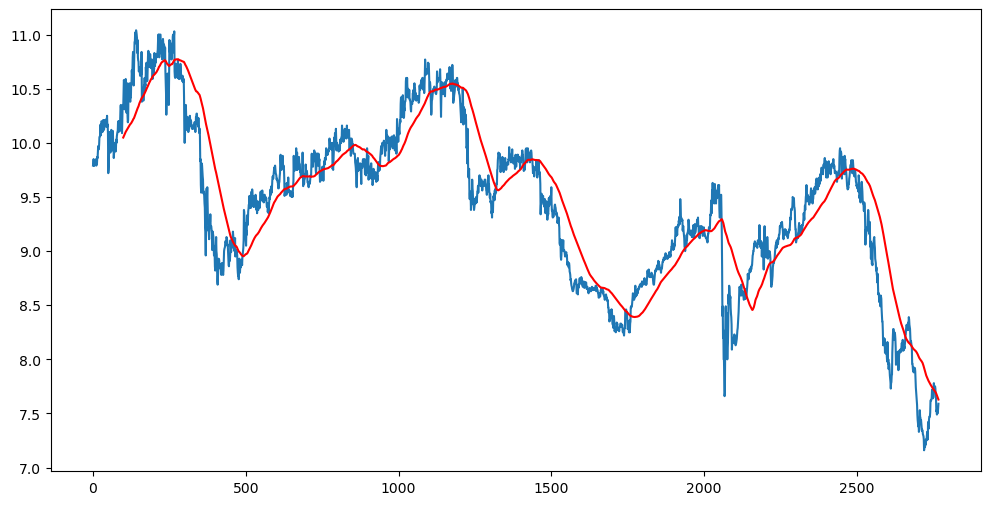

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200=df.Close.rolling(200).mean()
ma200

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
2763    7.92090
2764    7.91415
2765    7.90775
2766    7.90165
2767    7.89605
Name: Close, Length: 2768, dtype: float64

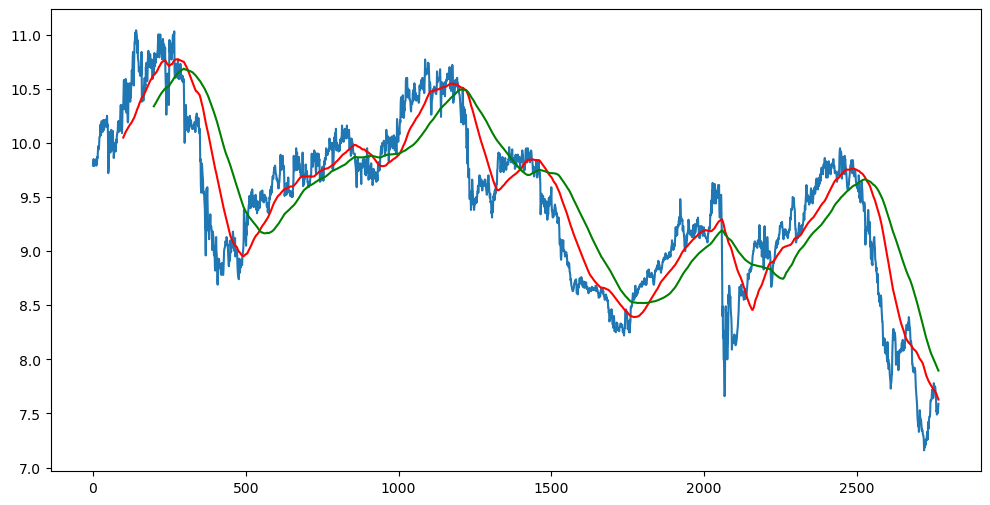

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1937, 1)
(831, 1)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.55673754],
       [0.5638299 ],
       [0.57801429],
       ...,
       [0.32978704],
       [0.31914884],
       [0.29078007]])

In [16]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(1837, 100, 1)
(1837,)


In [17]:
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential 

In [18]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model=Sequential()
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model=Sequential()
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model=Sequential()
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.build(input_shape=(None, x_train.shape[1], 1))



In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 120)               58560     
                                                                 
 dropout_3 (Dropout)         (None, 120)               0         
                                                                 
 dense (Dense)               (None, 1)                 121       
                                                                 
Total params: 58681 (229.22 KB)
Trainable params: 58681 (229.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
58/58 [==============================] - 5s 49ms/step - loss: 0.0509
Epoch 2/50
58/58 [==============================] - 3s 56ms/step - loss: 0.0111
Epoch 3/50
58/58 [==============================] - 3s 57ms/step - loss: 0.0100
Epoch 4/50
58/58 [==============================] - 3s 51ms/step - loss: 0.0086
Epoch 5/50
58/58 [==============================] - 3s 47ms/step - loss: 0.0081
Epoch 6/50
58/58 [==============================] - 3s 51ms/step - loss: 0.0073
Epoch 7/50
58/58 [==============================] - 3s 50ms/step - loss: 0.0072
Epoch 8/50
58/58 [==============================] - 3s 52ms/step - loss: 0.0068
Epoch 9/50
58/58 [==============================] - 3s 53ms/step - loss: 0.0061
Epoch 10/50
58/58 [==============================] - 3s 50ms/step - loss: 0.0060
Epoch 11/50
58/58 [==============================] - 3s 50ms/step - loss: 0.0060
Epoch 12/50
58/58 [==============================] - 3s 51ms/step - loss: 0.0058
Epoch 13/50
58/58 [==================

In [21]:
past_100_days=data_training.tail(100)
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7920\674358354.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [22]:
final_df.head()

,Close
0,8.72
1,8.75
2,8.79
3,8.82
4,8.81


In [23]:
input_data=scaler.fit_transform(final_df)

In [24]:
input_data

array([[0.55913994],
       [0.56989254],
       [0.58422944],
       [0.59498203],
       [0.59139806],
       [0.59856634],
       [0.59856634],
       [0.59856634],
       [0.60573497],
       [0.60931894],
       [0.61290325],
       [0.61290325],
       [0.59856634],
       [0.62724015],
       [0.61648756],
       [0.62365584],
       [0.61290325],
       [0.61290325],
       [0.60573497],
       [0.59856634],
       [0.60215066],
       [0.59856634],
       [0.58781375],
       [0.59856634],
       [0.60215066],
       [0.60215066],
       [0.61290325],
       [0.62365584],
       [0.62365584],
       [0.63082446],
       [0.62724015],
       [0.63799274],
       [0.63799274],
       [0.63082446],
       [0.63799274],
       [0.63440877],
       [0.64157706],
       [0.65232965],
       [0.63799274],
       [0.64157706],
       [0.63799274],
       [0.63440877],
       [0.64157706],
       [0.63799274],
       [0.63440877],
       [0.64516137],
       [0.63799274],
       [0.645

In [25]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
x_test,y_test=np.array(x_test),np.array(y_test)

In [26]:
#x_test.T

In [27]:
y_predicted=model.predict(x_test)

26/26 [==============================] - 1s 19ms/step


In [28]:
#y_predicted

In [29]:
scaler.scale_

array([0.35842294])

In [30]:
scale_factor=1/0.00721059
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

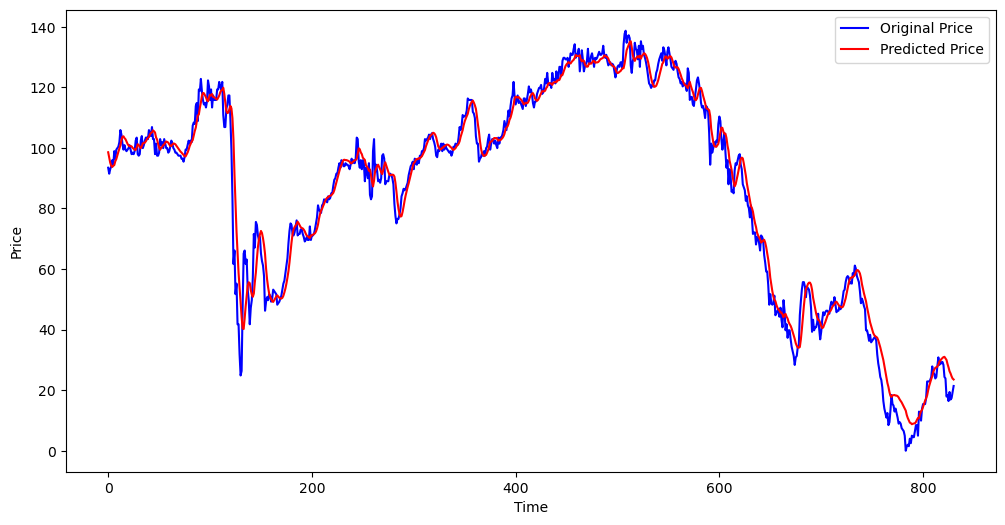

In [31]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()